In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import ar_select_order, AutoReg

plt.rcParams["figure.figsize"] = (15,8)

#### AR - Autoregressive Model

- 1) Load the data - IMPORTANT: remainder.csv!

In [16]:
df = pd.read_csv('data/TG_remainder.csv', index_col=0, parse_dates=True)

<AxesSubplot:xlabel='DATE', ylabel='remainder'>

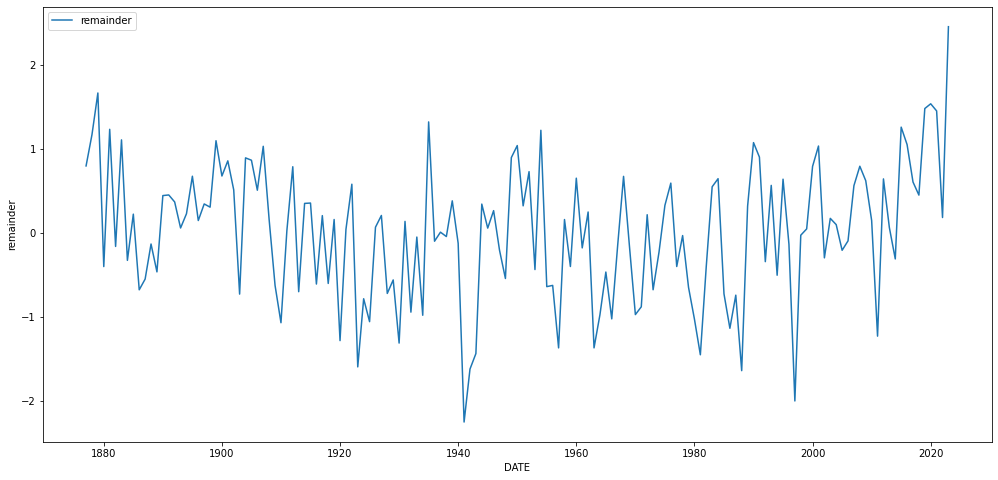

In [17]:
plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df.resample('Y').mean().index, y = 'remainder',data = df.resample('Y').mean() , label="remainder")

#### 2) Create a time-lagged input feature: lag1

In [18]:
df['lag1'] = df['remainder'].shift(1)
df.head()

,remainder,lag1
DATE,,
1876-01-01,3.069966,NaN
1876-01-02,3.369933,3.069966
1876-01-03,1.169899,3.369933
1876-01-04,-4.930134,1.169899
1876-01-05,-8.930167,-4.930134


#### 3) Inspect correlations

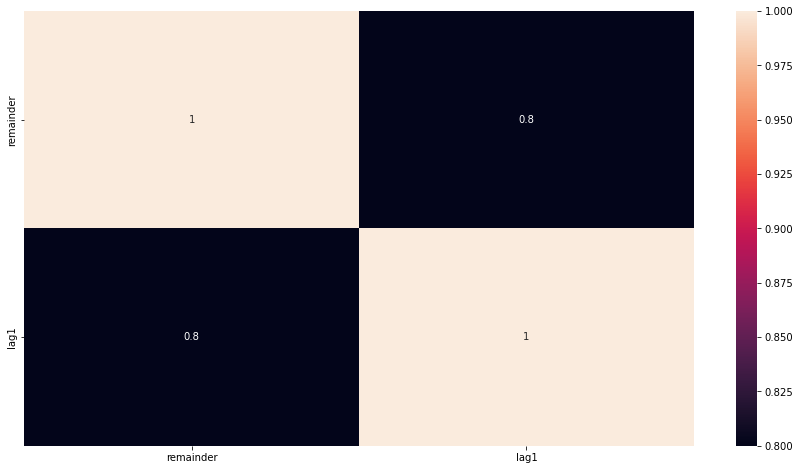

In [19]:
sns.heatmap(round(df.corr(), 2), annot=True)
plt.gcf().set_facecolor('white')

#### 4) Plot remainder against lag1

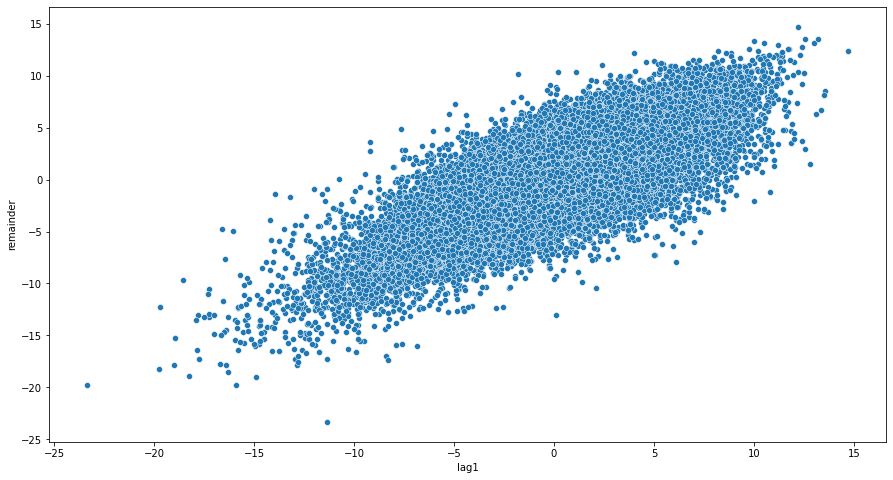

In [20]:
sns.scatterplot(x='lag1', y='remainder', data=df)
plt.gcf().set_facecolor('white')

#### AR - Autoregressive Model

#### 5) Run an Autoregression (Linear Regression) of lag1 on the remainder

In [21]:
# Drop missing values
df.dropna(inplace=True)
df.head()

,remainder,lag1
DATE,,
1876-01-02,3.369933,3.069966
1876-01-03,1.169899,3.369933
1876-01-04,-4.930134,1.169899
1876-01-05,-8.930167,-4.930134
1876-01-06,-6.830201,-8.930167


In [22]:
# Assign X and y
X = df[['lag1']]
y = df['remainder']

In [23]:
# Create and fit the model
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [24]:
# Create predictions
df['predictions_ar1'] = m.predict(X)
df.head()

,remainder,lag1,predictions_ar1
DATE,,,
1876-01-02,3.369933,3.069966,2.467843
1876-01-03,1.169899,3.369933,2.708966
1876-01-04,-4.930134,1.169899,0.940503
1876-01-05,-8.930167,-4.930134,-3.962915
1876-01-06,-6.830201,-8.930167,-7.178280


<AxesSubplot:xlabel='DATE', ylabel='remainder'>

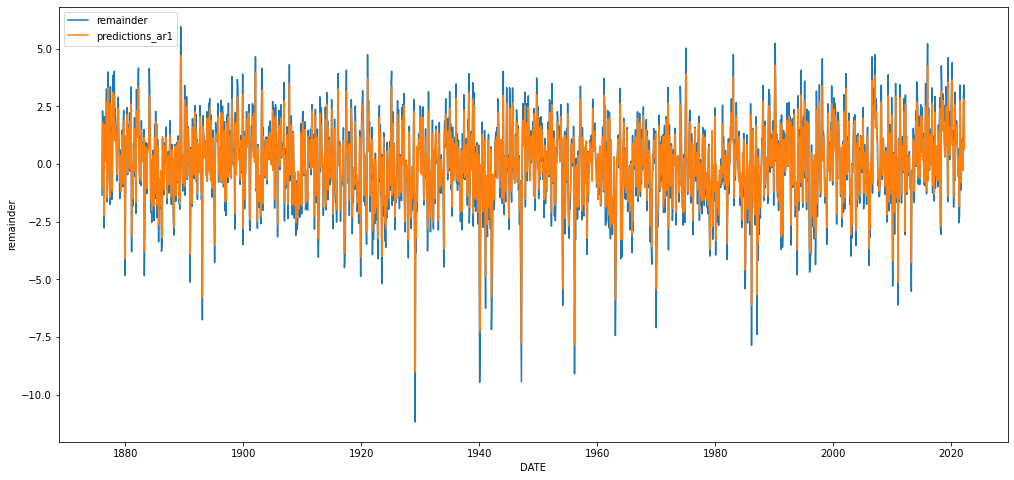

In [25]:
plt.figure(figsize = (17,8))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df.resample('M').mean().index, y = 'remainder',data = df.resample('M').mean() , label="remainder")
sns.lineplot(x = df.resample('M').mean().index, y = 'predictions_ar1',data = df.resample('M').mean() , label="predictions_ar1")


#### 6) Should we add lag2?

How could we find out?

In [26]:
df['lag2'] = df['remainder'].shift(2)
df.head()

,remainder,lag1,predictions_ar1,lag2
DATE,,,,
1876-01-02,3.369933,3.069966,2.467843,NaN
1876-01-03,1.169899,3.369933,2.708966,NaN
1876-01-04,-4.930134,1.169899,0.940503,3.369933
1876-01-05,-8.930167,-4.930134,-3.962915,1.169899
1876-01-06,-6.830201,-8.930167,-7.178280,-4.930134


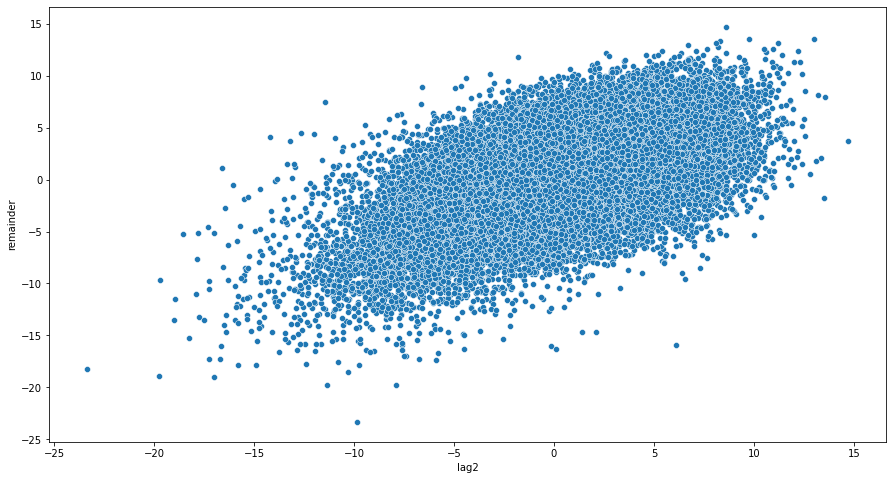

In [27]:
sns.scatterplot(x='lag2', y='remainder', data=df)
plt.gcf().set_facecolor('white')

- The relation between the remainder and lag2 might just be due to the relation between the remainder and lag1 and the relation between lag1 and lag2

In [28]:
round(df[['remainder', 'lag1', 'lag2']].corr(), 2)

,remainder,lag1,lag2
remainder,1.0,0.8,0.6
lag1,0.8,1.0,0.8
lag2,0.6,0.8,1.0


#### 6.1) Partial Autocorrelation

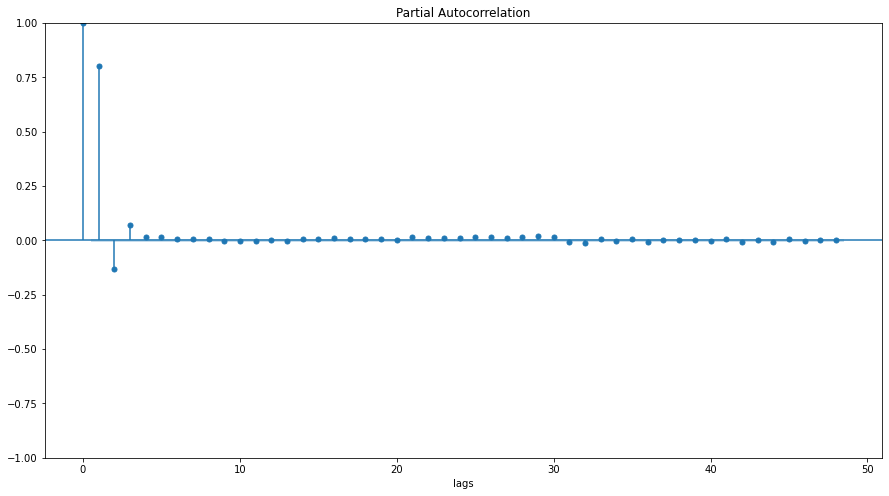

In [29]:
# Statsmodels provides a function called plot_pacf
# plot partial autocorrelation function
plot_pacf(df['remainder'], method='ywm')
plt.gcf().set_facecolor('white')
plt.xlabel('lags');

#### 6.2) Introducing statsmodels and ar_select_order

In [30]:
selected_order = ar_select_order(df['remainder'], maxlag = 12)

C:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Master\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [31]:
selected_order.ar_lags

[1, 2, 3, 4]

- Adding extra lags(3 and 4)

In [32]:
# Assign X and y
df['lag3'] = df['remainder'].shift(3)
df['lag4'] = df['remainder'].shift(4)

In [33]:
df.head()

,remainder,lag1,predictions_ar1,lag2,lag3,lag4
DATE,,,,,,
1876-01-02,3.369933,3.069966,2.467843,NaN,NaN,NaN
1876-01-03,1.169899,3.369933,2.708966,NaN,NaN,NaN
1876-01-04,-4.930134,1.169899,0.940503,3.369933,NaN,NaN
1876-01-05,-8.930167,-4.930134,-3.962915,1.169899,3.369933,NaN
1876-01-06,-6.830201,-8.930167,-7.178280,-4.930134,1.169899,3.369933


-  Assigning X and y

In [34]:
# Drop missing values
df.dropna(inplace=True)
df.head()

,remainder,lag1,predictions_ar1,lag2,lag3,lag4
DATE,,,,,,
1876-01-06,-6.830201,-8.930167,-7.178280,-4.930134,1.169899,3.369933
1876-01-07,-5.730234,-6.830201,-5.490254,-8.930167,-4.930134,1.169899
1876-01-08,-8.030267,-5.730234,-4.606063,-6.830201,-8.930167,-4.930134
1876-01-09,-11.830301,-8.030267,-6.454909,-5.730234,-6.830201,-8.930167
1876-01-10,-8.030334,-11.830301,-9.509508,-8.030267,-5.730234,-6.830201


In [35]:
# Assign X and y
X = df[['lag1','lag2','lag3','lag4']]
y = df['remainder']

In [36]:
# Create and fit the model
m = LinearRegression()
m.fit(X, y)

LinearRegression()

In [37]:
# Create predictions
df['predictions_ar4'] = m.predict(X)
df.head()

,remainder,lag1,predictions_ar1,lag2,lag3,lag4,predictions_ar4
DATE,,,,,,,
1876-01-06,-6.830201,-8.930167,-7.178280,-4.930134,1.169899,3.369933,-7.135883
1876-01-07,-5.730234,-6.830201,-5.490254,-8.930167,-4.930134,1.169899,-4.800087
1876-01-08,-8.030267,-5.730234,-4.606063,-6.830201,-8.930167,-4.930134,-4.510748
1876-01-09,-11.830301,-8.030267,-6.454909,-5.730234,-6.830201,-8.930167,-6.789692
1876-01-10,-8.030334,-11.830301,-9.509508,-8.030267,-5.730234,-6.830201,-9.743914


<AxesSubplot:xlabel='DATE', ylabel='remainder'>

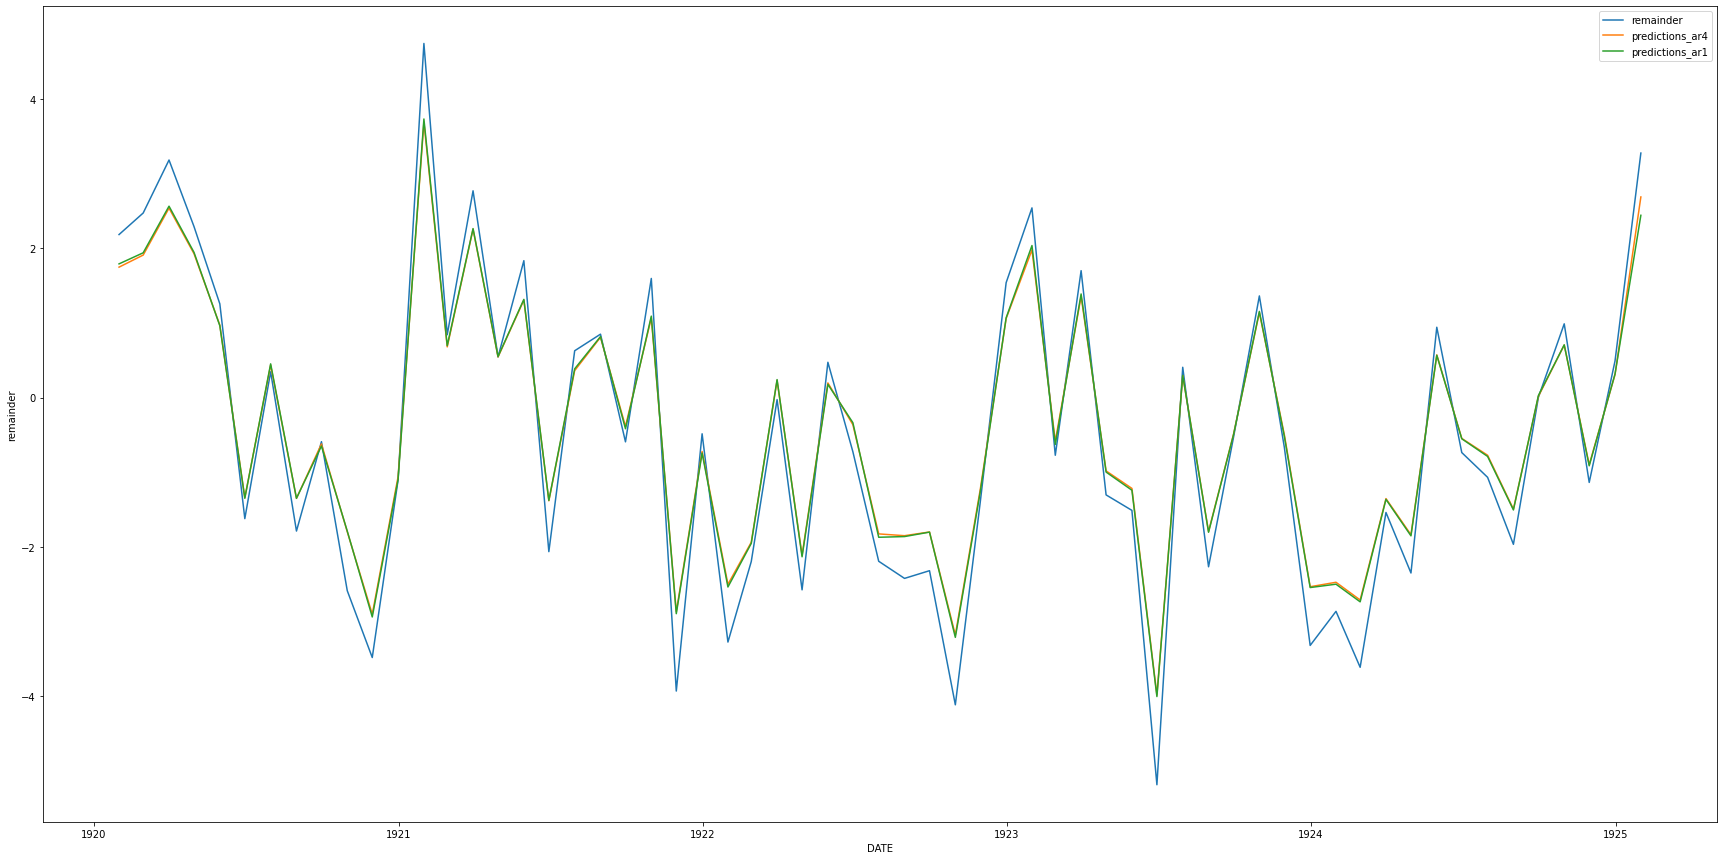

In [38]:
plt.figure(figsize = (30,15))
plt.gcf().set_facecolor('white')
sns.lineplot(x = df.loc["1920-01-01":"1925-01-01"].resample('M').mean().index, y = 'remainder',data = df.loc["1920-01-01":"1925-01-01"].resample('M').mean() , label="remainder")
sns.lineplot(x = df.loc["1920-01-01":"1925-01-01"].resample('M').mean().index, y = 'predictions_ar4',data = df.loc["1920-01-01":"1925-01-01"].resample('M').mean() , label="predictions_ar4")
sns.lineplot(x = df.loc["1920-01-01":"1925-01-01"].resample('M').mean().index, y = 'predictions_ar1',data = df.loc["1920-01-01":"1925-01-01"].resample('M').mean() , label="predictions_ar1")
